# Analysing NSFAF data for international students

NSFAF publicily releases all data about students on their [website](nsfaf.na)

We will do very simple data analysis on one of the files released in 2019 using Python.

In [121]:
# importing modules
import matplotlib.pyplot as plt
import pandas as pd

**Import and reading our data**

Note: I have converted this data into a **csv** file

In [2]:
data = pd.read_csv("international.csv")

**Getting the first 5 rows**

In [4]:
data.head()

,First Name,Surname,Unique Id,Namibian Id,Student Number,Qualification Type,Program of Study,Institution,Country
0,JUMAA MG MG,ALWEENDO,19KHOM_0449,P0759605,M00686720,Degree,"Law (general, international, labour, maritime,...",Middlesex University Mauritius,Mauritius
1,REGINA T,AMALWA,19OHAN_1942,98061000482,1901001428,Degree,Pre-Medical Sciences Programme,Lusaka Apex Medical University,Zambia
2,JASON T,ANGULA,19OSHI_0458,98112300240,1618314,Degree,Bachelor of Science in Medical Laboratory Tech...,Maharishi Markandeshwar,India
3,GRACE N,ANGULA,19KHOM_4118,98040200229,019-031,Degree,MBChB,CAVENDISH UNIVERSITY,Zambia
4,Ester Namadhila,Ashipala,19OMUS_3740,96121000187,P0938966,VTC/HTC,N4-N6 ELECTRICAL ENGINEERING,COLLEGE OF CAPE TOWN,South Africa


**Getting the last 5 rows**

In [6]:
data.tail()

,First Name,Surname,Unique Id,Namibian Id,Student Number,Qualification Type,Program of Study,Institution,Country
190,Alletta,Hammond,19KHOM_0109,69030501057,26708906,BACHELOR OF EDUCATION,DEGREE,North West Univeristy,South Africa
191,NSIMBA,JOAO,19KAVE_2406,99022100057,0-41874,BACHELOR OF LAW,DEGREE,CAVENDISH UNIVERSITY,Zambia
192,Hamutenya,Mweshipandeka,19frgn_0002,97080200547,103 1204 AF19,Bachelor of Arts: Internatio,DEGREE,Vincent Pol University,Poland
193,Uejanaua,Tjihumino,19khom_4141,00041900553,S3741648,Bachelor of International a,DEGREE,Rijksuniversiteit Groningen Netherlands,Netherlands
194,Muyendekwa,Simataa,19KHOM_1223,98042300042,216064455,Bachelor of Accounting,Degree,University of Johannesburg,South Africa


**Size of our dataframe**

In [11]:
data.size

1755

**Number of rows**

Note: this includes the first row which contains our columns

In [15]:
len(data)

195

**Number of columns**

In [16]:
len(data.columns)

9

## Analysis

**In which countries are our students studying?**

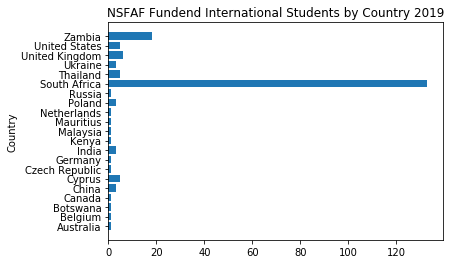

In [125]:
list_of_countries = list(data['Country'])
countries_dict = {k: list_of_countries.count(k) for k in list_of_countries}

X = []
Y = []

for k, v in countries_dict.items():
    X.append(k)
    Y.append(v)
plt.title('NSFAF Fundend International Students by Country 2019')
plt.ylabel('Country')
plt.barh(X, Y)
plt.savefig('countries')

From the above observation, we can see that most of our students are studying

in South Africa. Most of the students who received funding are studyin in SADC.

**Types of qualifications**

In [72]:
qtype1 = list(data['Qualification Type'][ :190])
qtype2 = list(data['Program of Study'][190:])

qtype_total = qtype1.copy()
for q in qtype2:
    qtype_total.append(q)
qtype_total[189] = 'Degree'

qtype_dict = {q: qtype_total.count(q) for q in qtype_total}
# Append the value of the 'DEGREE'  to another 'Degree' key and delete it
qtype_dict['Degree'] += qtype_dict['DEGREE']
del qtype_dict['DEGREE']

**Which type of qualifications are mostly funded?**

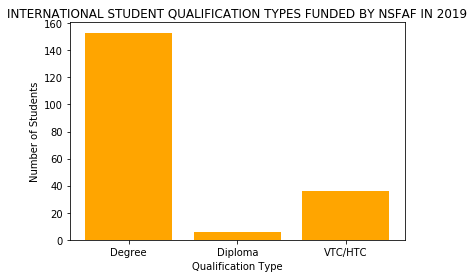

In [122]:
X = []
Y = []
for k, v in qtype_dict.items():
    X.append(k)
    Y.append(v)
plt.title('INTERNATIONAL STUDENT QUALIFICATION TYPES FUNDED BY NSFAF IN 2019')
plt.xlabel('Qualification Type')
plt.ylabel('Number of Students')
plt.bar(X, Y, color='orange')
plt.savefig('qualifications')

A lot of funding given by NSFAF goes to students who are studying undergraduate degree programs. A small fraction goes to diploma students and a Minimun fraction goes to VTC/HTC students

**From which regions are these students from?**

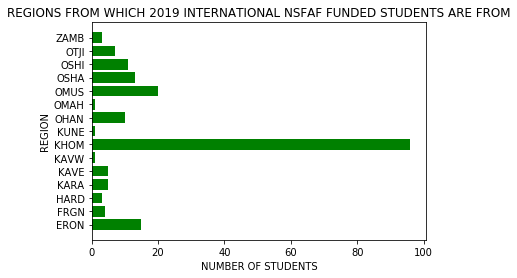

In [123]:
regions = list(data['Unique Id'])
reg = []
for r in regions:
    reg.append(r[2:6])
reg[-2] = 'KHOM'
reg[-3] = 'FRGN'
reg_dict = {r : reg.count(r) for r in reg}
X = [k for k,_ in reg_dict.items()]
Y = [v for _,v in reg_dict.items()]

plt.title('REGIONS FROM WHICH 2019 INTERNATIONAL NSFAF FUNDED STUDENTS ARE FROM')
plt.xlabel('NUMBER OF STUDENTS')
plt.ylabel('REGION')
plt.barh(X, Y, color='green')
plt.savefig('regions')

**KHOMAS** wins here!

It is to no suprise that many students studying abroad are from Khomas.

And hey! We have **4** foreigners[**FRGN**]. Where are they from?

**Which institutions are winning?**

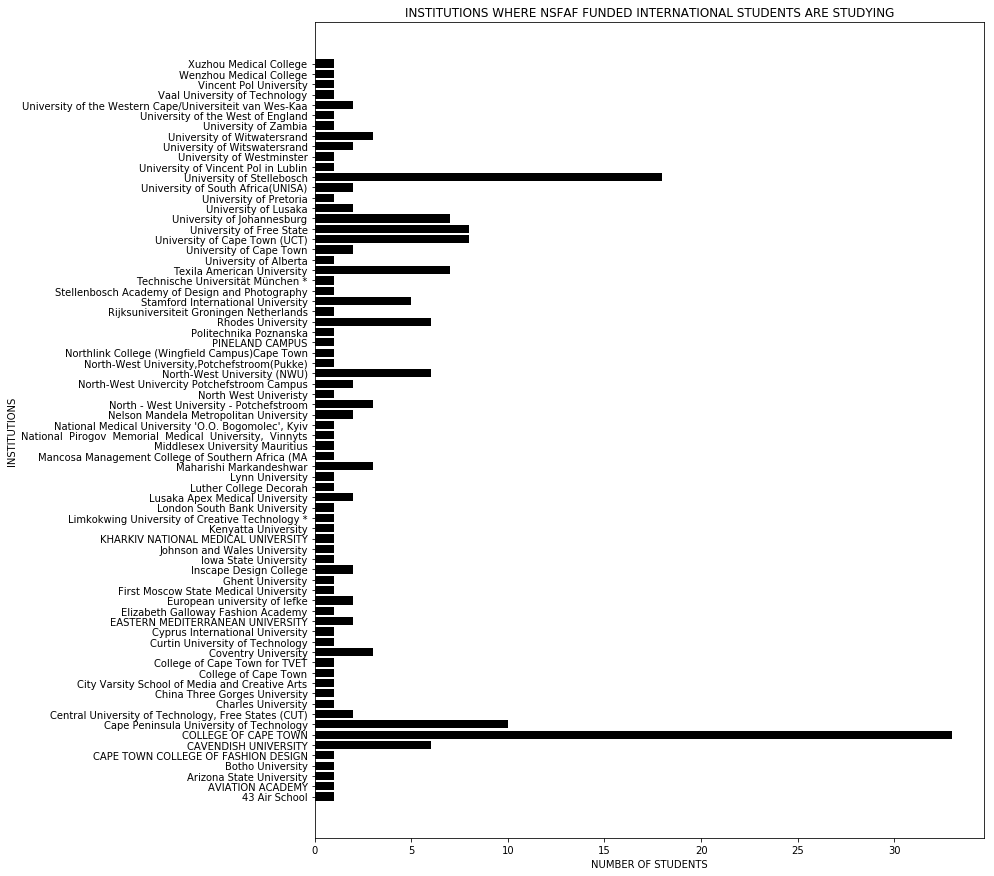

In [124]:
"""Since NSFAF data is super messed up, we will have a little data cleaning process here"""
institutions = list(data['Institution'])

institut_dict = {inst: institutions.count(inst) for inst in institutions}
institut_dict['University of Stellebosch'] += institut_dict['Stellenbosch University']
del institut_dict['Stellenbosch University']
institut_dict['University of Stellebosch'] += institut_dict['University Stellenbosch']
del institut_dict['University Stellenbosch']
institut_dict['University of Stellebosch'] += institut_dict['Univeristy of Stelenbosch']
del institut_dict['Univeristy of Stelenbosch']
institut_dict['University of Johannesburg'] += institut_dict['mUniversity of Johannesburg']
del institut_dict['mUniversity of Johannesburg']
institut_dict['North - West University - Potchefstroom'] += institut_dict['North-West University Potchefstroom Campus South Afric']
del institut_dict['North-West University Potchefstroom Campus South Afric']
institut_dict['North - West University - Potchefstroom'] += institut_dict['NWU Potchefstroom']
del institut_dict['NWU Potchefstroom']
institut_dict['CAVENDISH UNIVERSITY'] += institut_dict['Cavendish']
del institut_dict['Cavendish']
institut_dict['CAVENDISH UNIVERSITY'] += institut_dict['CAVENDISH UNIVERSITY ZAMBIA']
del institut_dict['CAVENDISH UNIVERSITY ZAMBIA']
institut_dict['Cape Peninsula University of Technology'] += institut_dict['Cape Pensula University of Technology']
del institut_dict['Cape Pensula University of Technology']
institut_dict['University of Free State'] += institut_dict['University of the Free State/Universiteit van die Vrystaat']
del institut_dict['University of the Free State/Universiteit van die Vrystaat']
institut_dict['COLLEGE OF CAPE TOWN' ]+= institut_dict['College of CapeTown']
del institut_dict['College of CapeTown']

# plotting
X = [k for k,_ in institut_dict.items()]
Y = [v for _,v in institut_dict.items()]

plt.figure(figsize=(12,15))
plt.title('INSTITUTIONS WHERE NSFAF FUNDED INTERNATIONAL STUDENTS ARE STUDYING')
plt.xlabel('NUMBER OF STUDENTS')
plt.ylabel('INSTITUTIONS')
plt.barh(X, Y, color='black')
plt.savefig('institutions')

The college of Cape Town has the most international students
Many students are also studying at Stellenbosch and Cape Peninsula University of Technology. There were a lot of typos on Institution names. You might find some Institutions representent twice. 

**We can do more with these data.**
Today, this is all we want to know.

Please follow me at my [website](kanhalelor.github.io)